<a href="https://colab.research.google.com/github/SergJohn/Crypto-Prediction-2022-Project/blob/main/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://ai-2018447.s3.eu-west-1.amazonaws.com/logo.jpg"/>

<img src="https://ai-2018447.s3.eu-west-1.amazonaws.com/CoverPage_Capstone.JPG"/>

<img src="https://ai-2018447.s3.eu-west-1.amazonaws.com/Declaration.JPG"/>

# Table of Contents

> - [Data Exploration Analysis - EDA](#EDA)

> - [Prophet](#Prophet)
 
> - [ARIMA](#ARIMA)

> - [LSTM](#LSTM)

> - [Exponential Smoothing](#EXP)

> - [Trade Recommendation Function](#AUTO)

> - [Dashboard](#DASH)

---
<a id="EDA"></a>

# Data Exploration Analysis - EDA
---

In [ ]:
#pip install --upgrade pandas pip install --upgrade pandas-datareader
#pip install pandas-datareader

import pandas_datareader as pdr
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt

import seaborn as sns

In [ ]:
data_btc = pdr.get_data_yahoo('BTC-USD')
data_et = pdr.get_data_yahoo('ETH-USD')


In [ ]:
data_btc.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-05-16,1785.939941,1686.540039,1741.699951,1734.449951,959044992,1734.449951
2017-05-17,1864.050049,1661.910034,1726.729980,1839.089966,1064729984,1839.089966
2017-05-18,1904.479980,1807.119995,1818.699951,1888.650024,894321024,1888.650024
2017-05-19,2004.520020,1890.250000,1897.369995,1987.709961,1157289984,1987.709961
2017-05-20,2084.729980,1974.920044,1984.239990,2084.729980,961336000,2084.729980


In [ ]:
data_et.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-11-09,329.451996,307.056000,308.644989,320.884003,893249984,320.884003
2017-11-10,324.717987,294.541992,320.670990,299.252991,885985984,299.252991
2017-11-11,319.453003,298.191986,298.585999,314.681000,842300992,314.681000
2017-11-12,319.153015,298.513000,314.690002,307.907990,1613479936,307.907990
2017-11-13,328.415009,307.024994,307.024994,316.716003,1041889984,316.716003


---
### Basic EDA
---

---
The next few steps it will be perform EDA, to understand and clean the data if needed.

---

In [ ]:
data_btc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2017-05-16 to 2022-05-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1826 non-null   float64
 1   Low        1826 non-null   float64
 2   Open       1826 non-null   float64
 3   Close      1826 non-null   float64
 4   Volume     1826 non-null   int64  
 5   Adj Close  1826 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 99.9 KB


In [ ]:
data_et.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2017-11-09 to 2022-05-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1649 non-null   float64
 1   Low        1649 non-null   float64
 2   Open       1649 non-null   float64
 3   Close      1649 non-null   float64
 4   Volume     1649 non-null   int64  
 5   Adj Close  1649 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 90.2 KB


In [ ]:
data_btc.duplicated().sum()


0

In [ ]:
data_et.duplicated().sum()

0

In [ ]:
data_btc.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [ ]:
data_et.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

To check if there is a possible outlier it was checked by running a loop loading a boxplot for each column, notice that the ethereum has data that it out of the boxplot quartile, however, that is not outliers, but a spike in the value of the currency.

In [ ]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#sns.set_theme(style="whitegrid")


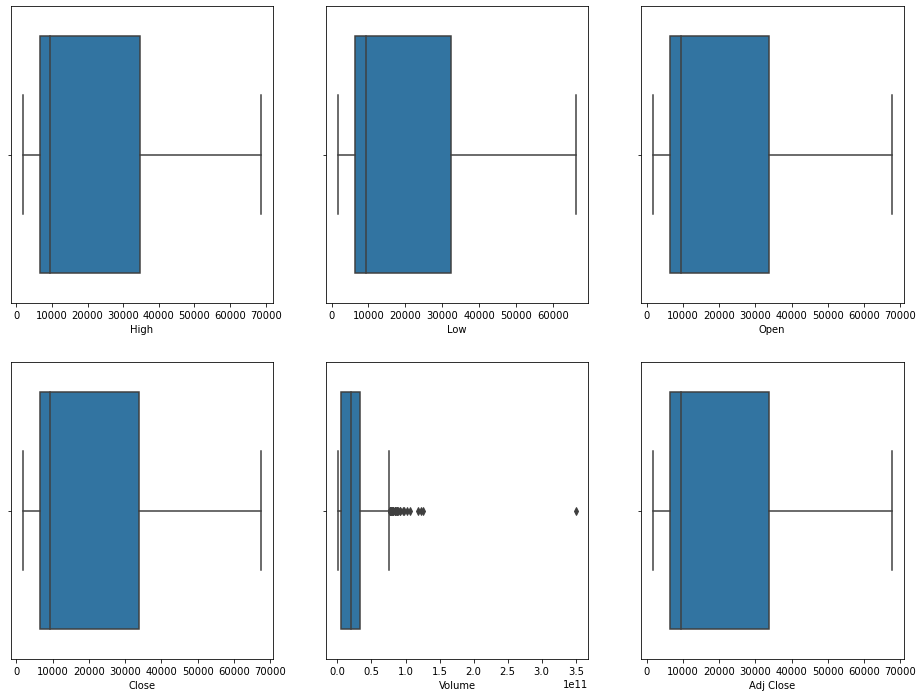

In [ ]:
fig,ax = plt.subplots(2,3, figsize=(16, 12))
ax = ax.flatten()
i = 0
for column in data_btc:
    #plt.figure()
    sns.boxplot(data_btc[column],ax=ax[i] )
    i +=1

plt.show()

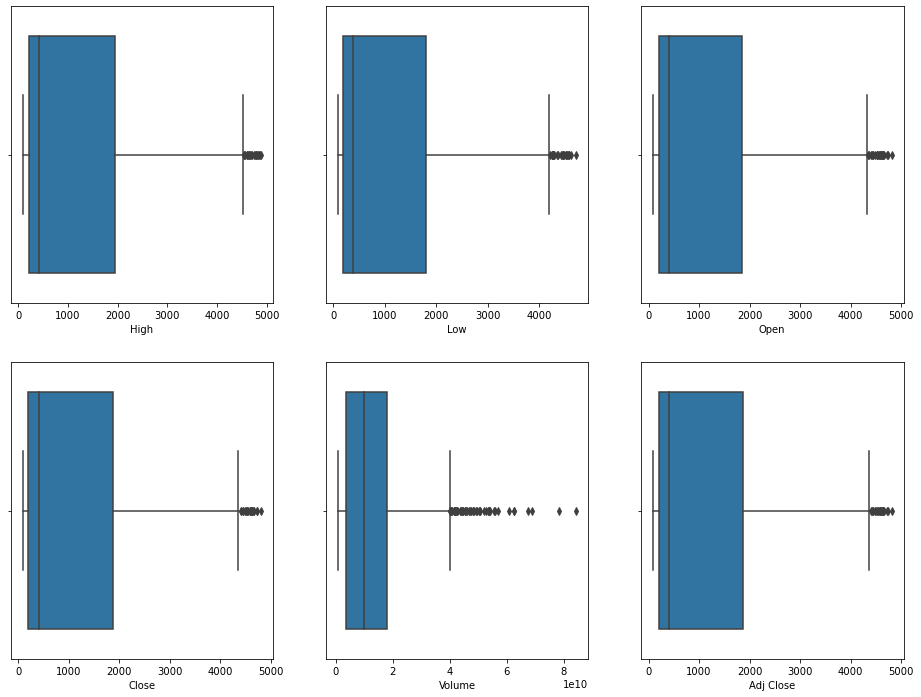

In [ ]:
fig,ax = plt.subplots(2,3, figsize=(16, 12))
ax = ax.flatten()
i = 0
for column in data_et:
    #plt.figure()
    sns.boxplot(data_et[column],ax=ax[i] )
    i +=1

plt.show()

<a id="Prophet"></a>

---
# PROPHET MODEL
---

---
### Imports to use prophet
---

In [ ]:
#pip install pystan fbprophet


  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.68
Note: you may need to restart the kernel to use updated packages.    Uninstalling cmdstanpy-0.9.68:
      Successfully uninstalled cmdstanpy-0.9.68



ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.0.1 requires cmdstanpy==0.9.68, but you have cmdstanpy 0.9.5 which is incompatible.
You should consider upgrading via the 'C:\Users\jonathansantos\anaconda3\python.exe -m pip install --upgrade pip' command.


In [ ]:
#pip install prophet

  Using cached cmdstanpy-0.9.68-py3-none-any.whl (49 kB)
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
You should consider upgrading via the 'C:\Users\jonathansantos\anaconda3\python.exe -m pip install --upgrade pip' command.


In [ ]:
import pandas as pd
from fbprophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric


---
To start working with prophet, we were testing using few dataset, however the price of crypto currency can change very easily it was decided to use Yahoo finance, meaning that everytime we run the code we will get the must updated amount of crytocurrency.

---

As the Prophet will use the date and the close column to perform the prediction, the data could not be used as Index, as we load the data the index is the date, to fix this it was used reset_index method.

In [ ]:
data_btc=data_btc.reset_index()

In [ ]:
data_et=data_et.reset_index()

In [ ]:
data_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1826 non-null   datetime64[ns]
 1   High       1826 non-null   float64       
 2   Low        1826 non-null   float64       
 3   Open       1826 non-null   float64       
 4   Close      1826 non-null   float64       
 5   Volume     1826 non-null   int64         
 6   Adj Close  1826 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 100.0 KB


---
The only columns that will be needed are the Date and closing, closing because is the final amount of the day

---

In [ ]:
data_btc.drop(['High', 'Low', 'Open', 'Volume', 'Adj Close'], axis=1, inplace=True)

In [ ]:
data_et.drop(['High', 'Low', 'Open', 'Volume', 'Adj Close'], axis=1, inplace=True)

In [ ]:
data_btc.tail()

,Date,Close
1821,2022-05-11,28936.355469
1822,2022-05-12,29047.751953
1823,2022-05-13,29283.103516
1824,2022-05-14,30101.265625
1825,2022-05-15,30940.724609


In [ ]:
data_et.tail()

,Date,Close
1644,2022-05-11,2072.108643
1645,2022-05-12,1961.701538
1646,2022-05-13,2014.418213
1647,2022-05-14,2056.273926
1648,2022-05-15,2124.435547


---
Prophet model uses standards labels, such as DS for datastamp and Y for the numeric column, both columns need to be on the right format to be perfomed by prophet model 

---


In [ ]:
data_btc.columns = ['ds','y']

In [ ]:
data_et.columns = ['ds','y']

The next plots are displaying the closing amount throught time for both currencies 

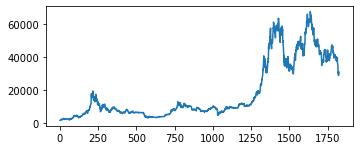

In [ ]:
fig = plt.figure(figsize = (5.5, 5.5))
ax = fig.add_subplot(2, 1, 1)
fig.subplots_adjust(hspace = 0.5)
data_btc['y'].plot(ax = ax)

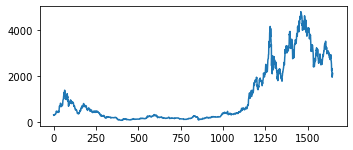

In [ ]:
fig = plt.figure(figsize = (5.5, 5.5))
ax = fig.add_subplot(2, 1, 1)
fig.subplots_adjust(hspace = 0.5)
data_et['y'].plot(ax = ax)

In [ ]:
data_btc.tail()

,ds,y
1821,2022-05-11,28936.355469
1822,2022-05-12,29047.751953
1823,2022-05-13,29283.103516
1824,2022-05-14,30101.265625
1825,2022-05-15,30940.724609


In [ ]:
data_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1826 non-null   datetime64[ns]
 1   y       1826 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 28.7 KB


---
To fit the model given, we firstly instantiate a new prophet object

Prophet automatically detects changes in trends by selecting changepoints from the data 

interval_width=0.95’ is the uncertainty interval to produce a confidence interval around the forecast.

the change point will make the model more flexible to fit the data points

we are aiming to see if the model is able to catch historical data well, after some changes in the parameters it was possible to increase on fitting the data.

y(t) = g(t) + s(t) + h(t) + e(t)
g(t)- trends for example the growth of bitcoin/ethereum over time
s(t) - seasonality, in this case it was used yearly and monthly
h(t) - holidays - this is not used as there is no effect on cryto
e(t) - can be declared as the noise

This is the formula used in prophet
however there is no much seasonality in our dataset on yearly for the last 2 years it started indicating an inicial seasonality.

---

In [ ]:
model_btc= Prophet(interval_width=0.95, yearly_seasonality=True, weekly_seasonality=True, changepoint_prior_scale=2)
model_btc.add_seasonality(name='monthly', period=30.5, fourier_order=5, prior_scale=0.02)
md = model_btc.fit(data_btc)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
m_et = Prophet(interval_width=0.95, yearly_seasonality=True, changepoint_prior_scale=2)
#m_et.add_seasonality(name='monthly', period=30.5, fourier_order=5, prior_scale=0.02)
model_et = m_et.fit(data_et)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


---
The make future and predict method creates a data frame that will return a prediction with the number of days that are inserted inside the parameters periods, and set to use the frequence as Day. this prediction will give results such, trends,lowest and highest for the closing

---


In [ ]:
future_btc = md.make_future_dataframe(periods=50,freq='D')
forecast = md.predict(future_btc)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1871,2022-06-30,35993.693592,1258.066910,43705.468016,15054.691505,57410.428734,-14408.875083,-14408.875083,-14408.875083,-257.945766,...,-48.524914,-48.524914,-48.524914,-14102.404404,-14102.404404,-14102.404404,0.0,0.0,0.0,21584.818509
1872,2022-07-01,35956.256553,-262.764060,45083.221783,14131.407349,57867.907438,-14313.979088,-14313.979088,-14313.979088,-131.309752,...,-18.814719,-18.814719,-18.814719,-14163.854617,-14163.854617,-14163.854617,0.0,0.0,0.0,21642.277465
1873,2022-07-02,35918.819514,-757.600505,44086.110231,13594.845255,58325.386141,-14206.024523,-14206.024523,-14206.024523,-1.996371,...,11.844148,11.844148,11.844148,-14215.872300,-14215.872300,-14215.872300,0.0,0.0,0.0,21712.794991
1874,2022-07-03,35881.382474,-734.893255,44662.522692,12898.293412,58810.306724,-14196.557101,-14196.557101,-14196.557101,66.957208,...,-6.430923,-6.430923,-6.430923,-14257.083386,-14257.083386,-14257.083386,0.0,0.0,0.0,21684.825373
1875,2022-07-04,35843.945435,-1098.367858,45341.527722,12185.241293,59462.992984,-14213.918548,-14213.918548,-14213.918548,44.620139,...,27.685411,27.685411,27.685411,-14286.224097,-14286.224097,-14286.224097,0.0,0.0,0.0,21630.026887


In [ ]:
future_et = m_et.make_future_dataframe(periods=50, freq='D')
forecast_et = m_et.predict(future_et)
forecast_et.tail(20)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1679,2022-06-15,3107.998526,1568.662542,2987.333747,2449.524668,3754.103014,-824.904246,-824.904246,-824.904246,5.618178,5.618178,5.618178,-830.522424,-830.522424,-830.522424,0.0,0.0,0.0,2283.094280
1680,2022-06-16,3107.831974,1511.389970,2953.321274,2401.088491,3788.296082,-834.679040,-834.679040,-834.679040,-1.291188,-1.291188,-1.291188,-833.387852,-833.387852,-833.387852,0.0,0.0,0.0,2273.152934
1681,2022-06-17,3107.665422,1476.717993,3022.310329,2333.029356,3818.133059,-841.528759,-841.528759,-841.528759,-5.732740,-5.732740,-5.732740,-835.796019,-835.796019,-835.796019,0.0,0.0,0.0,2266.136663
1682,2022-06-18,3107.498870,1397.164245,3096.296756,2315.164286,3848.334117,-839.216278,-839.216278,-839.216278,-1.391967,-1.391967,-1.391967,-837.824311,-837.824311,-837.824311,0.0,0.0,0.0,2268.282593
1683,2022-06-19,3107.332319,1457.543297,3085.463220,2288.688310,3880.502712,-839.664005,-839.664005,-839.664005,-0.119503,-0.119503,-0.119503,-839.544502,-839.544502,-839.544502,0.0,0.0,0.0,2267.668314
1684,2022-06-20,3107.165767,1404.475364,3096.920107,2254.674167,3914.927050,-840.178149,-840.178149,-840.178149,0.843257,0.843257,0.843257,-841.021405,-841.021405,-841.021405,0.0,0.0,0.0,2266.987618
1685,2022-06-21,3106.999215,1231.417887,3186.296456,2201.411252,3946.435288,-840.237772,-840.237772,-840.237772,2.073963,2.073963,2.073963,-842.311736,-842.311736,-842.311736,0.0,0.0,0.0,2266.761443
1686,2022-06-22,3106.832663,1330.023903,3193.841983,2128.256511,3977.943526,-837.845026,-837.845026,-837.845026,5.618178,5.618178,5.618178,-843.463204,-843.463204,-843.463204,0.0,0.0,0.0,2268.987637
1687,2022-06-23,3106.666111,1224.015485,3256.568649,2056.012204,4009.516529,-845.805041,-845.805041,-845.805041,-1.291188,-1.291188,-1.291188,-844.513853,-844.513853,-844.513853,0.0,0.0,0.0,2260.861070
1688,2022-06-24,3106.499559,1055.405653,3245.152214,2006.667094,4041.585996,-851.224374,-851.224374,-851.224374,-5.732740,-5.732740,-5.732740,-845.491634,-845.491634,-845.491634,0.0,0.0,0.0,2255.275185


---
For the main purpose of the prediction only the columns ds - dataStamp and Yhat - the numerical value of the trained data followed by the prediction

---

In [ ]:
forecast[['ds','yhat']]

,ds,yhat
0,2017-05-16,5788.257134
1,2017-05-17,5419.955282
2,2017-05-18,4895.521907
3,2017-05-19,4476.223650
4,2017-05-20,4056.513357
...,...,...
1871,2022-06-30,21584.818509
1872,2022-07-01,21642.277465
1873,2022-07-02,21712.794991
1874,2022-07-03,21684.825373


In [ ]:
forecast_et[['ds','yhat']]

,ds,yhat
0,2017-11-09,-0.541542
1,2017-11-10,42.415154
2,2017-11-11,92.135446
3,2017-11-12,136.700863
4,2017-11-13,178.813200
...,...,...
1694,2022-06-30,2254.085392
1695,2022-07-01,2249.056819
1696,2022-07-02,2252.999731
1697,2022-07-03,2254.110059


In [ ]:
cutoffs = pd.to_datetime(['2020-01-01', '2020-06-15', '2021-02-15'])
dt_cv = cross_validation(model_btc, cutoffs=cutoffs, horizon='365 days')

  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
dt_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-01-02,7381.167460,6114.938259,8602.123193,6985.470215,2020-01-01
1,2020-01-03,7464.084634,6308.001604,8676.201265,7344.884277,2020-01-01
2,2020-01-04,7541.343595,6323.459109,8755.265899,7410.656738,2020-01-01
3,2020-01-05,7570.570393,6337.149966,8758.632702,7411.317383,2020-01-01
4,2020-01-06,7651.699994,6517.677789,8882.737459,7769.219238,2020-01-01
...,...,...,...,...,...,...
1090,2022-02-11,94498.955764,-93216.577157,265575.207637,42407.937500,2021-02-15
1091,2022-02-12,94900.465454,-92391.095684,266649.508862,42244.468750,2021-02-15
1092,2022-02-13,95262.005208,-93901.753957,266231.984867,42197.515625,2021-02-15
1093,2022-02-14,95741.659178,-94726.196626,268103.217991,42586.917969,2021-02-15


In [ ]:
dt_m = performance_metrics(dt_cv)
dt_m.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,1.272247e+07,3566.856822,2340.737508,0.110857,0.112095,0.121447,0.804281
1,38 days,1.251264e+07,3537.320956,2333.738106,0.114258,0.112128,0.125488,0.813456
2,39 days,1.236989e+07,3517.085224,2349.530258,0.118236,0.114237,0.130164,0.822630
3,40 days,1.191993e+07,3452.525780,2346.907662,0.121712,0.121860,0.134259,0.831804
4,41 days,1.131422e+07,3363.661211,2336.440901,0.125384,0.123349,0.138663,0.840979


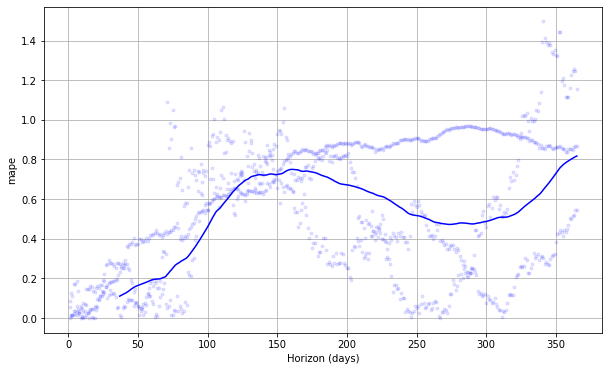

In [ ]:
fig = plot_cross_validation_metric(dt_cv, metric='mape')


<a id="Prophet Results"></a>

### Bitcoin R_2 score

---
to check the accuracy of our predictions it was used r2 score, the best possible score is 1.0 however, too high might mean that the data is overfitting

---

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
train_btc = data_btc[:int(0.85 * (len(data_btc)))]
test_btc  = data_btc[int(0.85 * (len(data_btc))):]

train_btc.shape, test_btc.shape

((1552, 2), (274, 2))

In [ ]:
future_btc = md.make_future_dataframe(periods=1, freq='D')
forecast_btc = md.predict(future_btc)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1871,2022-06-30,35993.693592,1258.066910,43705.468016,15054.691505,57410.428734,-14408.875083,-14408.875083,-14408.875083,-257.945766,...,-48.524914,-48.524914,-48.524914,-14102.404404,-14102.404404,-14102.404404,0.0,0.0,0.0,21584.818509
1872,2022-07-01,35956.256553,-262.764060,45083.221783,14131.407349,57867.907438,-14313.979088,-14313.979088,-14313.979088,-131.309752,...,-18.814719,-18.814719,-18.814719,-14163.854617,-14163.854617,-14163.854617,0.0,0.0,0.0,21642.277465
1873,2022-07-02,35918.819514,-757.600505,44086.110231,13594.845255,58325.386141,-14206.024523,-14206.024523,-14206.024523,-1.996371,...,11.844148,11.844148,11.844148,-14215.872300,-14215.872300,-14215.872300,0.0,0.0,0.0,21712.794991
1874,2022-07-03,35881.382474,-734.893255,44662.522692,12898.293412,58810.306724,-14196.557101,-14196.557101,-14196.557101,66.957208,...,-6.430923,-6.430923,-6.430923,-14257.083386,-14257.083386,-14257.083386,0.0,0.0,0.0,21684.825373
1875,2022-07-04,35843.945435,-1098.367858,45341.527722,12185.241293,59462.992984,-14213.918548,-14213.918548,-14213.918548,44.620139,...,27.685411,27.685411,27.685411,-14286.224097,-14286.224097,-14286.224097,0.0,0.0,0.0,21630.026887


In [ ]:
evaluation_results = pd.DataFrame({'r2_score_bitcoin': r2_score(test_btc['y'], forecast_btc['yhat'][1553:])}, index = [0])
evaluation_results

,r2_score_bitcoin
0,0.845455


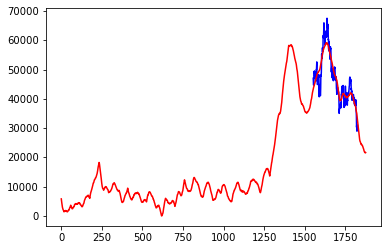

In [ ]:

test_btc['y'].plot(color='b', linestyle = '-')
forecast['yhat'].plot(color='r', linestyle = '-')

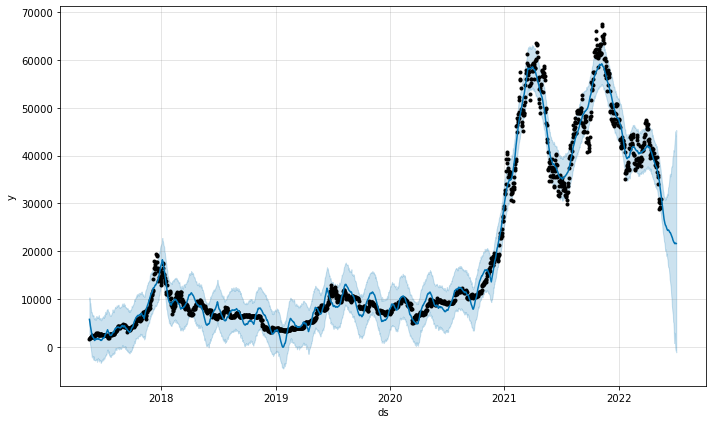

In [ ]:
plot = md.plot(forecast)

### Ethereum r_2 score

In [ ]:
train_et = data_et[:int(0.85 * (len(data_et)))]
test_et  = data_et[int(0.85 * (len(data_et))):]


train_et.shape, test_et.shape

((1401, 2), (248, 2))

In [ ]:
future_et = m_et.make_future_dataframe(periods=1, freq='D')
forecast_et = m_et.predict(future_et)
forec = forecast_et[int(0.85 * (len(data_et))):]
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1871,2022-06-30,35993.693592,1258.066910,43705.468016,15054.691505,57410.428734,-14408.875083,-14408.875083,-14408.875083,-257.945766,...,-48.524914,-48.524914,-48.524914,-14102.404404,-14102.404404,-14102.404404,0.0,0.0,0.0,21584.818509
1872,2022-07-01,35956.256553,-262.764060,45083.221783,14131.407349,57867.907438,-14313.979088,-14313.979088,-14313.979088,-131.309752,...,-18.814719,-18.814719,-18.814719,-14163.854617,-14163.854617,-14163.854617,0.0,0.0,0.0,21642.277465
1873,2022-07-02,35918.819514,-757.600505,44086.110231,13594.845255,58325.386141,-14206.024523,-14206.024523,-14206.024523,-1.996371,...,11.844148,11.844148,11.844148,-14215.872300,-14215.872300,-14215.872300,0.0,0.0,0.0,21712.794991
1874,2022-07-03,35881.382474,-734.893255,44662.522692,12898.293412,58810.306724,-14196.557101,-14196.557101,-14196.557101,66.957208,...,-6.430923,-6.430923,-6.430923,-14257.083386,-14257.083386,-14257.083386,0.0,0.0,0.0,21684.825373
1875,2022-07-04,35843.945435,-1098.367858,45341.527722,12185.241293,59462.992984,-14213.918548,-14213.918548,-14213.918548,44.620139,...,27.685411,27.685411,27.685411,-14286.224097,-14286.224097,-14286.224097,0.0,0.0,0.0,21630.026887


In [ ]:
fore = forec.iloc[1:, :]
fore

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1402,2021-09-11,3154.133392,2936.284736,3650.525741,3154.133392,3154.133392,136.855954,136.855954,136.855954,-1.391967,-1.391967,-1.391967,138.247921,138.247921,138.247921,0.0,0.0,0.0,3290.989345
1403,2021-09-12,3153.966840,2958.309643,3685.624635,3153.966840,3153.966840,146.362702,146.362702,146.362702,-0.119503,-0.119503,-0.119503,146.482205,146.482205,146.482205,0.0,0.0,0.0,3300.329542
1404,2021-09-13,3153.800288,2925.832413,3693.374914,3153.800288,3153.800288,155.460216,155.460216,155.460216,0.843257,0.843257,0.843257,154.616959,154.616959,154.616959,0.0,0.0,0.0,3309.260504
1405,2021-09-14,3153.633736,2922.863073,3691.503048,3153.633736,3153.633736,164.808041,164.808041,164.808041,2.073963,2.073963,2.073963,162.734078,162.734078,162.734078,0.0,0.0,0.0,3318.441778
1406,2021-09-15,3153.467184,2944.471173,3689.639156,3153.467184,3153.467184,176.534774,176.534774,176.534774,5.618178,5.618178,5.618178,170.916596,170.916596,170.916596,0.0,0.0,0.0,3330.001958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645,2022-05-12,3113.661289,2430.022705,3195.029358,3113.661289,3113.661289,-310.894079,-310.894079,-310.894079,-1.291188,-1.291188,-1.291188,-309.602891,-309.602891,-309.602891,0.0,0.0,0.0,2802.767210
1646,2022-05-13,3113.494737,2402.178350,3163.327588,3113.494737,3113.494737,-328.903726,-328.903726,-328.903726,-5.732740,-5.732740,-5.732740,-323.170986,-323.170986,-323.170986,0.0,0.0,0.0,2784.591012
1647,2022-05-14,3113.328186,2391.902470,3188.168923,3113.328186,3113.328186,-339.516982,-339.516982,-339.516982,-1.391967,-1.391967,-1.391967,-338.125015,-338.125015,-338.125015,0.0,0.0,0.0,2773.811203
1648,2022-05-15,3113.161634,2353.129358,3169.001818,3113.161634,3113.161634,-354.510465,-354.510465,-354.510465,-0.119503,-0.119503,-0.119503,-354.390963,-354.390963,-354.390963,0.0,0.0,0.0,2758.651168


In [ ]:
evaluation_results_et = pd.DataFrame({'r2_score_ethereum': r2_score(test_et['y'], fore['yhat'])}, index = [0])
evaluation_results_et


,r2_score_ethereum
0,0.797672


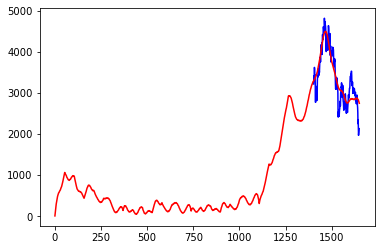

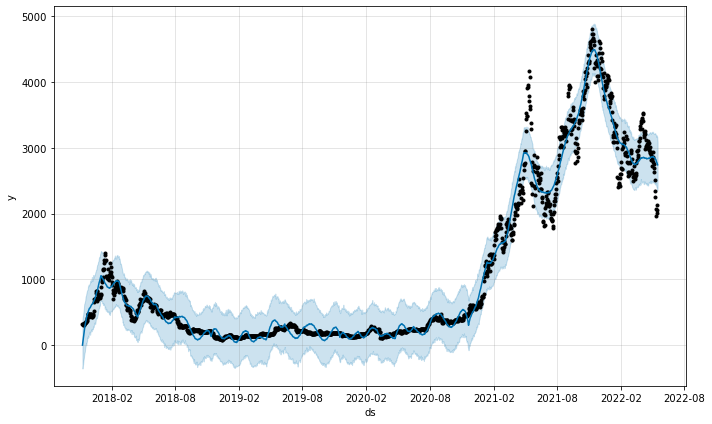

In [ ]:
test_et['y'].plot(color='b', linestyle = '-')
forecast_et['yhat'].plot(color='r', linestyle = '-')
plot =m_et.plot(forecast_et)

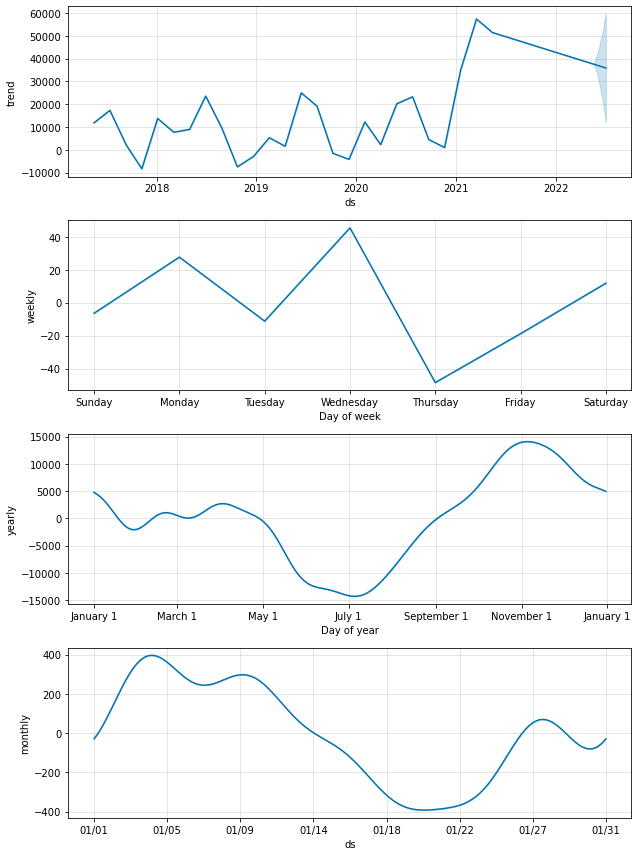

In [ ]:
plot2 = md.plot_components(forecast)

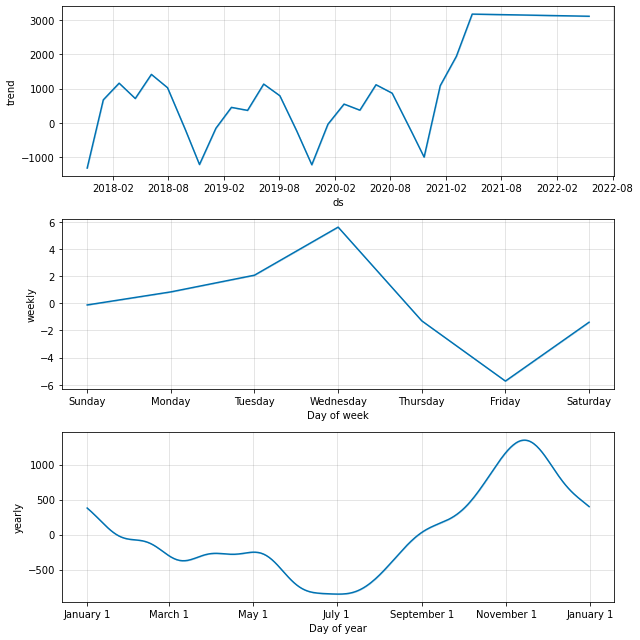

In [ ]:
plot2 = m_et.plot_components(forecast_et)

<a id="ARIMA"></a>

---
# ARIMA - Bitcoin

ARIMA (AutoRegressive Integrated Moving Average) is a forecasting algorithm based on the idea that the information in the past values of the time series can alone be used to predict the future values.

### AR ( Autoregression ) 
- Relationship between present observations with past observations
> * p = lag observations ( lag order )

### I ( Integrrated ) d
- Differencing of raw obsevations ( Make the time series stationary )
> * d = degree of differencing 

### MA ( Moving Average ) q
- Tool that indicate overall trend direction.
- It takes how wrong the last time period was to predict the correct next period
> * q = order of moving average
---

In [ ]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from tqdm import tqdm_notebook
import numpy as np


import statsmodels.api as sm

from itertools import product
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_log_error


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
%matplotlib inline


---
## Retrieve the data
---

In [ ]:
# Retrieve Data
df_ar = pdr.get_data_yahoo("BTC-USD")
df_ar.shape

(1826, 6)

---
* the dataset retrieved via Yahoo finance API contains around 1800 entries (days) since 2017
* There are 6 columns ( High, Low, Close, Adj Close, Open, Volume ) 
* We are only interested in "Close" prices to perform ARIMA prediction.

The good thing about using such dataset is that very little preparation needs to be done:

* there are no missing values
* the date is already indexed. ( Very important for time series prediction )
---

---
## Visualise dataset
---

<Figure size 864x360 with 0 Axes>

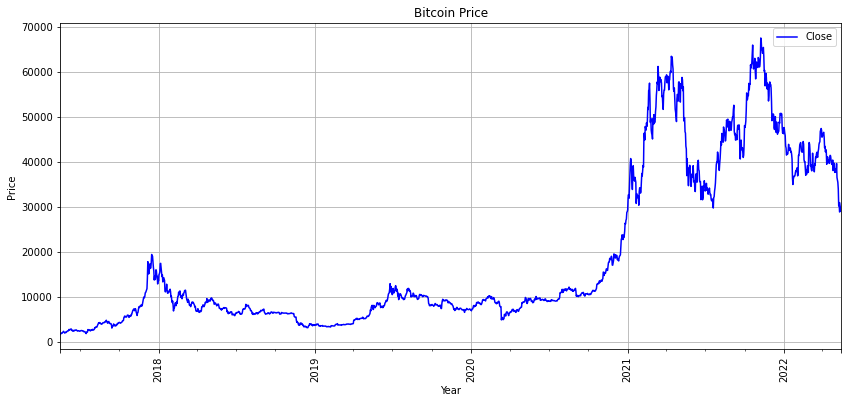

In [ ]:
# Visualize 
plt.figure(figsize=[12, 5]);
df_ar.plot( y = 'Close', figsize = (14, 6), color = 'b')
plt.title('Bitcoin Price')
plt.ylabel('Price')
plt.xlabel('Year')
plt.xticks(rotation = 90)
plt.grid(True)
plt.show()

---
## Stationarity

> For ARIMA model to work, data needs to be stationary:
>	- Mean needs to be constant ( should not go away from the axis over time )
>	- Standard deviation (sigma) is constant ( Fluctuating the same amount )
>    - Covariance is independent of time
>    - No seasonality ( Periodically behaviour )
    
## Check Stationarity ( ADF Test )

We'll use the Augumented Dickey Fuller (ADF) test to check if the time series is stationary.

The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then we can reject the null hypothesis and infer that the time series is indeed stationary.

So, in our case, if the p-value > 0.05 we'll need to find the order of differencing.

>- If p-value < 0.05 = Stationary
>- If p-value > 0.05 = Non stationary ( Differencing needed )
---

In [ ]:
# Check if price series is stationary
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_ar.Close.dropna())
print(f"p-value: {result[1]}")

p-value: 0.6125858635536362


---
## Correlation

- Fit the line and check for errors 
- How closely the datapoints are off the line
- High correlated = data points are very close to the line
- Correlation between current price and last days prices

## Autocorrelation

- it takes into consideration the correlation of the time series with itself
- It starts at 1, and data points should center in the autocorrelation plot
- Direct route between prices ( last month to today ) and Indirect route ( day by day )
- Pearson correlation


# ACF plot - AutoCorrelation
---

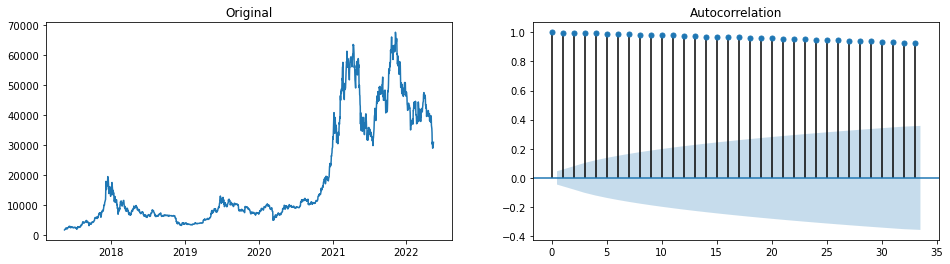

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(df_ar.Close)
ax1.set_title("Original")
plot_acf(df_ar.Close, ax=ax2);

---
## Differencing

Subtracting periodical values

* Differencing can help stabilise the mean of a time series by removing changes in the level of a time series, and therefore eliminating (or reducing) trend and seasonality.
---

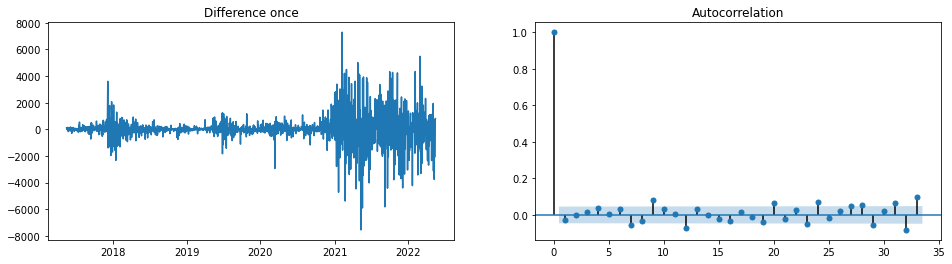

In [ ]:
diff = df_ar.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
plot_acf(diff, ax=ax2);

---
## Partial autocorrelation

- Error residuals that are not fit yet ( errors = deviations from the correlation )
- Fit each day leftover error and pass residuals to next day to be fit
- It takes previous days prices to estimate next days errors
- PACF: What is the direct effect of price between previous day and today

## PACF plot
---

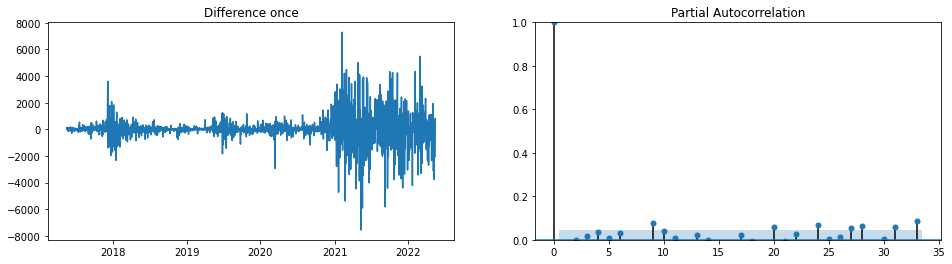

In [ ]:
diff = df_ar.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_pacf(diff, ax=ax2);

---
# Fit the model
---

In [ ]:
#Fit model
best_model = SARIMAX(df_ar['Close'], order = (1, 1, 1), seasonal_order = (1, 1, 1, 12)).fit(dis = -1)
print(best_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 1826
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -15103.189
Date:                            Sun, 15 May 2022   AIC                          30216.378
Time:                                    22:22:36   BIC                          30243.892
Sample:                                05-16-2017   HQIC                         30226.531
                                     - 05-15-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9998      6.359     -0.157      0.875     -13.463      11.464
ma.L1          0.9998      5.976   

---
## Dataset split to evaluate score

* 85% of the dataset used for training
* 15% of the dataset used for testing
---

In [ ]:
# Divide into train and validation set to calculate R-squared score and mean absolute percentage error 
train = df_ar[:int(0.85 * (len(df_ar)))]
test  = df_ar[int(0.85 * (len(df_ar))):]

train.shape, test.shape

((1552, 6), (274, 6))

---
## Predict values

* Predict test dataset using the previously trained model.
---

In [ ]:
start = len(train)
end   = len(train) + len(test) - 1
predictions = best_model.predict(start = start, end = end, dynamic = False, typ = 'levels').rename('ARIMA Predictions')
print(predictions)

2021-08-15    47080.465609
2021-08-16    47037.374442
2021-08-17    45889.103186
2021-08-18    44636.258248
2021-08-19    44711.502451
                  ...     
2022-05-11    31202.245699
2022-05-12    29041.672334
2022-05-13    28993.668167
2022-05-14    29286.151809
2022-05-15    30247.711982
Freq: D, Name: ARIMA Predictions, Length: 274, dtype: float64


---
# R-Squared and MAPE score

>Both methods compare the prediction with the actual prices to generate some sort of accuracy score:

>*  the R2 coefficient of determination is a statistical measure of how well the regression predictions approximate the real data points.
>* The mean absolute percentage error (MAPE), also known as mean absolute percentage deviation (MAPD), is a measure of prediction accuracy of a forecasting method in statistics.
---

In [ ]:
# Create a dataframe to store r2 score
evaluation_results = pd.DataFrame({'r2_score': r2_score(test['Close'], predictions)}, index = [0])

evaluation_results['MAPE'] = np.mean(np.abs(predictions - test['Close'])
                                                               /np.abs(test['Close']))*100 
# Display the results
evaluation_results

,r2_score,MAPE
0,0.963063,2.536858


---
## Forecasting 365 days ahead
---

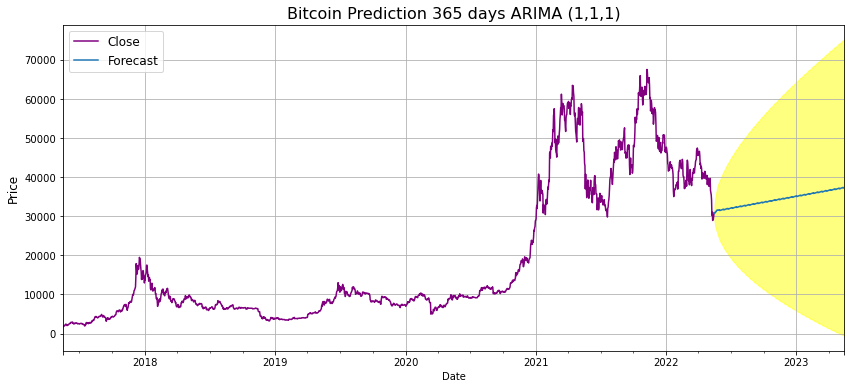

In [ ]:
# Forecasting 365 days ahead
forecast_values = best_model.get_forecast(steps = 365)

# Confidence intervals of the forecasted values
forecast_ci = forecast_values.conf_int()

# Plot the data
ax = df_ar.plot(y = 'Close', figsize = (14, 6), legend = True, color = 'purple')

# Plot the forecasted values 
forecast_values.predicted_mean.plot(ax = ax, label = 'Forecast', figsize = (14, 6), grid = True)

# Plot the confidence intervals
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[: , 0],
                forecast_ci.iloc[: , 1], color = 'yellow', alpha = .5)
plt.title('Bitcoin Prediction 365 days ARIMA (1,1,1)', size = 16)
plt.ylabel('Price', size = 12)
plt.legend(loc = 'upper left', prop = {'size': 12})
ax.axes.get_xaxis().set_visible(True)
# annotation
#ax.text(540, 400, 'Forecasted Values Until 2030', fontsize = 12,  color = 'red')
plt.show()

---
## Conclusion
---

---
* We can see that it predicts a straight line and the confidence intervals ( Yellow in the graph ) is quite high and the range  increases according to the amount of days to be predicted, which is expeceted.

* We can conclude that even though the square root score and Mean Absolute Percentage Error are quite good in the testing phase, the model does not perform great for long predictions but show potential for one day ( or data point ) prediction for example.
---

## ARIMA - Ethereum

In [ ]:
# Retrieve Data
df_eth = pdr.get_data_yahoo("ETH-USD")

result = adfuller(df_eth.Close.dropna())
print(f"p-value: {result[1]}")

#Fit model
best_model = SARIMAX(df_eth['Close'], order = (1, 1, 1), seasonal_order = (1, 1, 1, 12)).fit(dis = -1)
print(best_model.summary())

# Divide into train and validation set to calculate R-squared score and mean absolute percentage error 
train = df_eth[:int(0.85 * (len(df_eth)))]
test  = df_eth[int(0.85 * (len(df_eth))):]

train.shape, test.shape

#Predict Values
start = len(train)
end   = len(train) + len(test) - 1
predictions = best_model.predict(start = start, end = end, dynamic = False, typ = 'levels').rename('ARIMA Predictions')
#print(predictions)

# Create a dataframe to store r2 score
evaluation_results = pd.DataFrame({'r2_score': r2_score(test['Close'], predictions)}, index = [0])

evaluation_results['MAPE'] = np.mean(np.abs(predictions - test['Close'])
                                                               /np.abs(test['Close']))*100 
# Display the results
evaluation_results

p-value: 0.7280709004101387
                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 1649
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -9523.169
Date:                            Sun, 15 May 2022   AIC                          19056.338
Time:                                    22:29:21   BIC                          19083.338
Sample:                                11-09-2017   HQIC                         19066.353
                                     - 05-15-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1121      0.168     -0.669      0.504      -0.441       0.216
ma.L1  

,r2_score,MAPE
0,0.958022,3.214354


## Forecasting Ethereum(ARIMA) 365 days

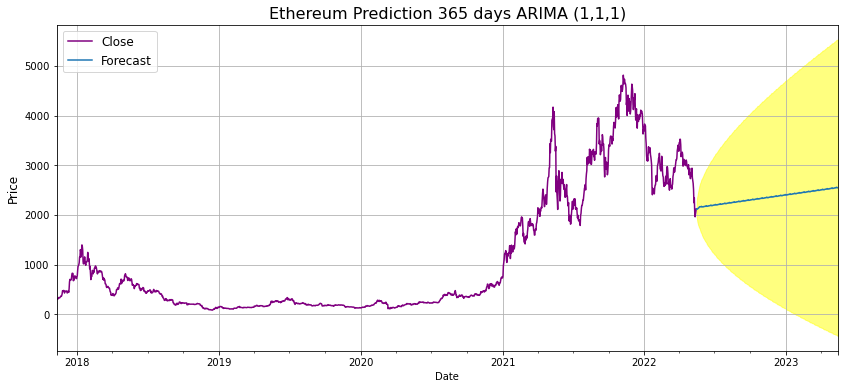

In [ ]:
# Forecasting 365 days ahead
forecast_values_eth = best_model.get_forecast(steps = 365)

# Confidence intervals of the forecasted values
forecast_ci = forecast_values_eth.conf_int()

# Plot the data
ax = df_eth.plot(y = 'Close', figsize = (14, 6), legend = True, color = 'purple')

# Plot the forecasted values 
forecast_values_eth.predicted_mean.plot(ax = ax, label = 'Forecast', figsize = (14, 6), grid = True)

# Plot the confidence intervals
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[: , 0],
                forecast_ci.iloc[: , 1], color = 'yellow', alpha = .5)
plt.title('Ethereum Prediction 365 days ARIMA (1,1,1)', size = 16)
plt.ylabel('Price', size = 12)
plt.legend(loc = 'upper left', prop = {'size': 12})
ax.axes.get_xaxis().set_visible(True)
# annotation
#ax.text(540, 400, 'Forecasted Values Until 2030', fontsize = 12,  color = 'red')
plt.show()

* Slow increase in the price predicted for the next 365 days

<a id="LSTM"></a>

# LSTM- Bitcoin

In [ ]:
#pip install keras
#pip install tensorflow

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras import Sequential

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

import pandas_datareader as pdr

In [ ]:
df = pdr.get_data_yahoo("BTC-USD")
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-05-16,1785.939941,1686.540039,1741.699951,1734.449951,959044992,1734.449951
2017-05-17,1864.050049,1661.910034,1726.729980,1839.089966,1064729984,1839.089966
2017-05-18,1904.479980,1807.119995,1818.699951,1888.650024,894321024,1888.650024
2017-05-19,2004.520020,1890.250000,1897.369995,1987.709961,1157289984,1987.709961
2017-05-20,2084.729980,1974.920044,1984.239990,2084.729980,961336000,2084.729980
...,...,...,...,...,...,...
2022-05-11,32013.402344,28170.414062,31016.183594,28936.355469,70388855818,28936.355469
2022-05-12,30032.439453,26350.490234,28936.734375,29047.751953,66989173272,29047.751953
2022-05-13,30924.802734,28782.330078,29030.910156,29283.103516,42841124537,29283.103516


In [ ]:
df = df.drop(['Open','High','Low','Adj Close', 'Volume'], axis=1)

---
## Splitting train and test datasets 

* According to the number of days for prediction
* 30 days in our case
---

In [ ]:
prediction_days = 30

#Bitcoin
df_train= df[:len(df)-prediction_days]
df_test= df[len(df)-prediction_days:]


---
## Scaling training set to fit the model
---

In [ ]:
training_set = df_train.values
training_set = min_max_scaler.fit_transform(training_set)

x_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]

x_train = np.reshape(x_train, (len(x_train), 1, 1))

---
## Fit LSTM model / Training data
---

In [ ]:
num_units = 4
activation_function = 'sigmoid'
optimizer = 'adam'
loss_function = 'mean_squared_error'
batch_size = 5
num_epochs = 10

# Initialize the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = num_units, activation = activation_function, input_shape=(None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = optimizer, loss = loss_function)

# Using the training set to train the model
regressor.fit(x_train, y_train, batch_size = batch_size, epochs = num_epochs)

Epoch 1/10
359/359 [==============================] - 2s 2ms/step - loss: 0.0573
Epoch 2/10
359/359 [==============================] - 1s 2ms/step - loss: 0.0407
Epoch 3/10
359/359 [==============================] - 1s 2ms/step - loss: 0.0268
Epoch 4/10
359/359 [==============================] - 1s 2ms/step - loss: 0.0146
Epoch 5/10
359/359 [==============================] - 1s 2ms/step - loss: 0.0062
Epoch 6/10
359/359 [==============================] - 1s 2ms/step - loss: 0.0020
Epoch 7/10
359/359 [==============================] - 1s 2ms/step - loss: 5.9255e-04
Epoch 8/10
359/359 [==============================] - 1s 2ms/step - loss: 3.0083e-04
Epoch 9/10
359/359 [==============================] - 1s 2ms/step - loss: 2.6274e-04
Epoch 10/10
359/359 [==============================] - 1s 2ms/step - loss: 2.5980e-04


---
## Predict values
---

In [ ]:
test_set = df_test.values

inputs = test_set
inputs = min_max_scaler.transform(inputs)
#inputs = np.reshape(inputs)

predicted_price = regressor.predict(inputs)
predicted_price = min_max_scaler.inverse_transform(predicted_price)

In [ ]:
my_array = np.array(predicted_price)

In [ ]:
prediction = pd.DataFrame(my_array, columns = ['Column_A'])

In [ ]:
my_array_two = np.array(test_set)

In [ ]:
test_lstm = pd.DataFrame(my_array_two, columns = ['Column_A'])

---
## Visualising Actual x Predicted
---

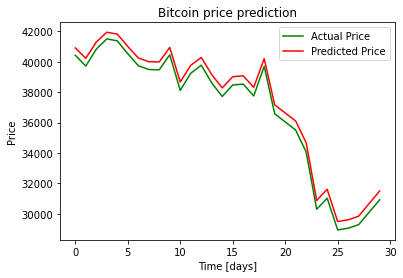

In [ ]:
plt.plot(test_set, label="Actual Price", color='green')
plt.plot(predicted_price, label="Predicted Price", color='red')
 
plt.title('Bitcoin price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
 
plt.show();

---
## Calculating accuracy using r2_Score and MAPE
---

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_log_error

In [ ]:
# Create a dataframe to store r2 score
evaluation_results = pd.DataFrame({'r2_score': r2_score(test_set, predicted_price)}, index = [0])
evaluation_results['MAPE'] = np.mean(np.abs(predicted_price - test_set)
                                                               /np.abs(test_set))*100 
# Display the results
evaluation_results

,r2_score,MAPE
0,0.983043,1.485989


## LSTM - Ethereum

Epoch 1/10
324/324 [==============================] - 2s 2ms/step - loss: 0.0568
Epoch 2/10
324/324 [==============================] - 1s 2ms/step - loss: 0.0400
Epoch 3/10
324/324 [==============================] - 1s 2ms/step - loss: 0.0283
Epoch 4/10
324/324 [==============================] - 1s 2ms/step - loss: 0.0178
Epoch 5/10
324/324 [==============================] - 1s 2ms/step - loss: 0.0096
Epoch 6/10
324/324 [==============================] - 1s 2ms/step - loss: 0.0043
Epoch 7/10
324/324 [==============================] - 1s 2ms/step - loss: 0.0017
Epoch 8/10
324/324 [==============================] - 1s 2ms/step - loss: 6.7182e-04
Epoch 9/10
324/324 [==============================] - 1s 3ms/step - loss: 4.1247e-04
Epoch 10/10
324/324 [==============================] - 1s 3ms/step - loss: 3.6801e-04


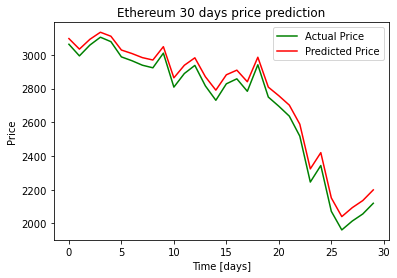

R2 Score and MAPE for Ethereum prediction using LSTM:


,r2_score,MAPE
0,0.973519,2.172896


In [ ]:
# Retrieve Data
df = pdr.get_data_yahoo("ETH-USD")
df = df.drop(['Open','High','Low','Adj Close', 'Volume'], axis=1)

#Splitting train and test datasets
prediction_days = 30

df_train= df[:len(df)-prediction_days]
df_test= df[len(df)-prediction_days:]

#Scaling training dataset to fit the model
training_set = df_train.values
training_set = min_max_scaler.fit_transform(training_set)

x_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]

x_train = np.reshape(x_train, (len(x_train), 1, 1))

#Fit LSTM Model
num_units = 4
activation_function = 'sigmoid'
optimizer = 'adam'
loss_function = 'mean_squared_error'
batch_size = 5
num_epochs = 10

# Initialize the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = num_units, activation = activation_function, input_shape=(None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = optimizer, loss = loss_function)

# Using the training set to train the model
regressor.fit(x_train, y_train, batch_size = batch_size, epochs = num_epochs)

#Predict Values
test_set_eth = df_test.values

inputs = test_set_eth
inputs = min_max_scaler.transform(inputs)
#inputs = np.reshape(inputs)

predicted_price_eth = regressor.predict(inputs)
predicted_price_eth = min_max_scaler.inverse_transform(predicted_price_eth)

#Visualising Actual x Predicted
plt.plot(test_set_eth, label="Actual Price", color='green')
plt.plot(predicted_price_eth, label="Predicted Price", color='red')
 
plt.title('Ethereum 30 days price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
 
plt.show();

# Create a dataframe to store r2 score
evaluation_results = pd.DataFrame({'r2_score': r2_score(test_set_eth, predicted_price_eth)}, index = [0])
evaluation_results['MAPE'] = np.mean(np.abs(predicted_price_eth - test_set_eth)
                                                               /np.abs(test_set))*100 
# Display the results
print('R2 Score and MAPE for Ethereum prediction using LSTM:')
evaluation_results

<a id="EXP"></a>

---
# **Exponential Smoothing Model Applied to Bitcoin**

---


### Imports

In [ ]:
#pip install --upgrade pandas pip install --upgrade pandas-datareader

In [ ]:
#pip install pandas-datareader

In [ ]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [ ]:
import pandas as pd

---
Importing the ExponentialSmoothing algorithm from statsmodels package

In [ ]:
from statsmodels.tsa.statespace.exponential_smoothing import ExponentialSmoothing

---
Through the pandas_datareader, let's get access to the Yahoo Finance.
This line of code will get the data from 2020 afterwards.

In [ ]:
df = pdr.get_data_yahoo('BTC-USD')

### Preparing the Data

---
Now, it is time to drop a few columns of the dataset and keep the Close column, in order to proceeding with our implementation

In [ ]:
df.drop(['High', 'Low', 'Open', 'Volume', 'Adj Close'], axis=1, inplace=True)

---
Transforming the index in a Date column

In [ ]:
df=df.reset_index()

In [ ]:
df["Date"] = pd.to_datetime(df["Date"])
df.tail()

,Date,Close
1821,2022-05-11,28936.355469
1822,2022-05-12,29047.751953
1823,2022-05-13,29283.103516
1824,2022-05-14,30101.265625
1825,2022-05-15,30881.998047


---

### Prediction


The following code will train, and fit the model, proceeding with and forecast of the desired amount of days - HORIZON, on this case -.

---

In [ ]:
HORIZON = 10

model = ExponentialSmoothing(endog = df['Close'])
results = model.fit()

preds = results.get_forecast(steps=HORIZON)

preds.summary_frame(alpha=0.2).head()

Close,mean,mean_se,mean_ci_lower,mean_ci_upper
1826,30860.6692,989.644393,29592.388878,32128.949522
1827,30860.6692,1381.098116,29090.720747,32630.617653
1828,30860.6692,1683.884791,28702.684010,33018.654390
1829,30860.6692,1939.975250,28374.490881,33346.847519
1830,30860.6692,2165.996295,28084.833257,33636.505143


---
The summary_frame above displays the mean, which on this case is the value predicted, and the confidence interval which is the lower and the upper columns on the very right hand side of the frame.

Note that the Exponential Smoothing prediction of the following 10 steps of the dataset have the same value. What will influency our prediction graph into a straith line.
It is due to the fact that the Exponential Smoothing formula requires the previous value of the dataset to predict the next value, and as our dataset has an ending, the formula will predict only one step ahead.

It does not mean that our prediction is wrong, just shows us that the Simple Exponential Smoothing Statistical prediction has also some sort of limitations. On the other hand, the precition has an upper and a lower bounder, which statistically places our prediction in a range of possible values.

The alternative for this, in case the business case requires more than one step ahead prediction, is to use the Multi-Step Forecasting methods. Not included in this project as our business case does not require it.


---

In [ ]:
print(results.forecast(steps=1))

1826    30860.6692
dtype: float64


The print above was done to explore the structure of the returned data from the forecast() function. This line of code is relevant and massively important for our Decision-making feature.

---

### Visualization

---

The plot below displays the predicted values + the confidence interval generated in this model implementation.
For the sake of a better visualization, it was scaled for the last 25 observations.

---

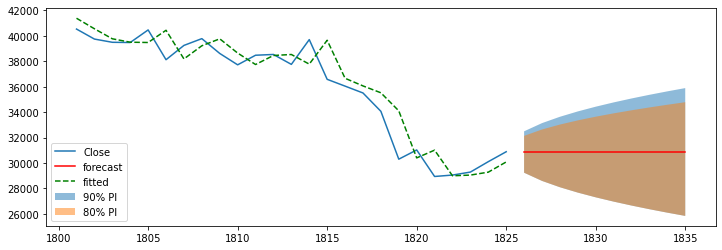

In [ ]:
ax = df['Close'].iloc[-25:].plot(figsize=(12,4))
forecast_80 = preds.summary_frame(alpha=0.2)[['mean', 'mean_ci_lower', 'mean_ci_upper']]
forecast_90 = preds.summary_frame(alpha=0.1)[['mean', 'mean_ci_lower', 'mean_ci_upper']]

ax.fill_between(forecast_90.index, forecast_90['mean_ci_lower'], forecast_90['mean_ci_upper'], alpha=0.5, label='90% PI')
ax.fill_between(forecast_80.index, forecast_90['mean_ci_lower'], forecast_80['mean_ci_upper'], alpha=0.5, label='80% PI')

forecast_80['mean'].iloc[-25:].plot(ax=ax, label='forecast', color='red')

results.fittedvalues.iloc[-25:].plot(ax=ax, label='fitted', color='green', linestyle='--')

ax.legend(loc=3)

### Evaluation

Statistical model

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Exponential Smoothing Results                         
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1826
Model:                   ETS(A, N, N)   Log Likelihood              -15185.535
Date:                Sun, 15 May 2022   AIC                          30377.070
Time:                        22:32:28   BIC                          30393.600
Sample:                             0   HQIC                         30383.167
                               - 1826   Scale                       979396.025
Covariance Type:                  opg                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.9734      0.015     65.630      0.000       0.944       1.002
initial_level    1734.4500   3.51e+05      0.005      0.996   -6.86e+05    6.89e+05
===================================================================================
Ljung-Box (Q):                      139.62   Jarque-Bera (JB):              8283.15
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              14.12   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd

from itertools import product
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_log_error

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Model residuals

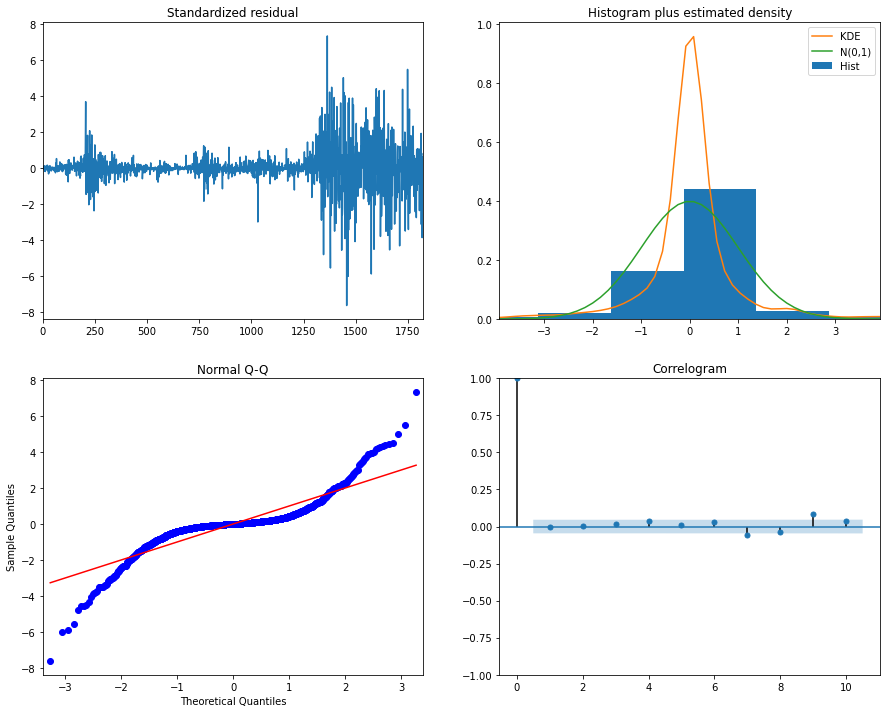

In [ ]:
# Diagnosing the model residuals
results.plot_diagnostics(figsize = (15, 12))
plt.show()

In [ ]:
# Divide into train and validation set to calculate R-squared score
train = df[:int(0.85 * (len(df)))]
test  = df[int(0.85 * (len(df))):]

train.shape, test.shape

((1552, 2), (274, 2))

In [ ]:
start = len(train)
end   = len(train) + len(test) - 1
predictions = results.predict(start = start, end = end, dynamic = False, typ = 'levels').rename('Simple Exponential Smoothing Predictions')
print(predictions)

1552    47113.096000
1553    47048.760194
1554    46032.234266
1555    44730.884599
1556    44799.319317
            ...     
1821    31006.299330
1822    28991.360779
1823    29046.253452
1824    29276.809620
1825    30079.357080
Name: Simple Exponential Smoothing Predictions, Length: 274, dtype: float64


In [ ]:
# Create a dataframe to store r2 score
evaluation_results = pd.DataFrame({'r2_score': r2_score(test['Close'], predictions)}, index = [0])

# Display the results
evaluation_results

,r2_score
0,0.963344


**The evaluation of our r2_score and residuals brings us a pretty good accurancy without overfitting.**

---

---

# Exponential Smoothing Model applied to ETHEREUM

To proceed with this implementation we will follow the same steps as the bitcoin implementation

---

In [ ]:
df_eth = pdr.get_data_yahoo('ETH-USD')

In [ ]:
df_eth.drop(['High', 'Low', 'Open', 'Volume', 'Adj Close'], axis=1, inplace=True)

In [ ]:
df_eth=df_eth.reset_index()

In [ ]:
df_eth["Date"] = pd.to_datetime(df_eth["Date"])
df.tail()

,Date,Close
1821,2022-05-11,28936.355469
1822,2022-05-12,29047.751953
1823,2022-05-13,29283.103516
1824,2022-05-14,30101.265625
1825,2022-05-15,30881.998047


In [ ]:
df_eth.head(10000)

,Date,Close
0,2017-11-09,320.884003
1,2017-11-10,299.252991
2,2017-11-11,314.681000
3,2017-11-12,307.907990
4,2017-11-13,316.716003
...,...,...
1644,2022-05-11,2072.108643
1645,2022-05-12,1961.701538
1646,2022-05-13,2014.418213
1647,2022-05-14,2056.273926


In [ ]:
from statsmodels.tsa.statespace.exponential_smoothing import ExponentialSmoothing

In [ ]:
HORIZON = 10

model_eth = ExponentialSmoothing(endog = df_eth['Close'])
results_eth = model_eth.fit()

preds_eth = results_eth.get_forecast(steps=HORIZON)

preds_eth.summary_frame(alpha=0.2).head()

Close,mean,mean_se,mean_ci_lower,mean_ci_upper
1649,2115.324568,80.079617,2012.698410,2217.950727
1650,2115.324568,109.609661,1974.854136,2255.795001
1651,2115.324568,132.724566,1945.231193,2285.417944
1652,2115.324568,152.372383,1920.051502,2310.597634
1653,2115.324568,169.761232,1897.766796,2332.882341


In [ ]:
preds_eth.summary_frame(alpha=0.2).head(10)

Close,mean,mean_se,mean_ci_lower,mean_ci_upper
1649,2115.324568,80.079617,2012.698410,2217.950727
1650,2115.324568,109.609661,1974.854136,2255.795001
1651,2115.324568,132.724566,1945.231193,2285.417944
1652,2115.324568,152.372383,1920.051502,2310.597634
1653,2115.324568,169.761232,1897.766796,2332.882341
1654,2115.324568,185.527379,1877.561665,2353.087472
1655,2115.324568,200.054845,1858.943968,2371.705169
1656,2115.324568,213.596521,1841.589613,2389.059524
1657,2115.324568,226.329420,1825.271746,2405.377391
1658,2115.324568,238.383177,1809.824235,2420.824902


---

The plot below displays the predicted values + the confidence interval generated in this model implementation.
For the sake of a better visualization, it was scaled for the last 85 observations.

---

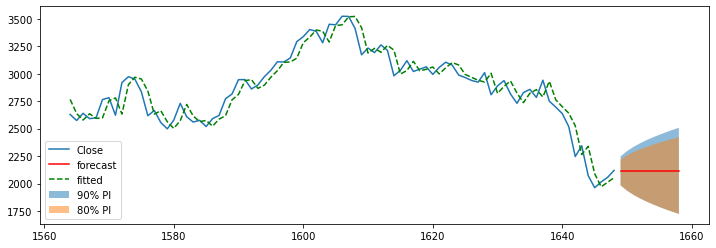

In [ ]:
ax_eth = df_eth['Close'].iloc[-85:].plot(figsize=(12,4))
forecast_80_eth = preds_eth.summary_frame(alpha=0.2)[['mean', 'mean_ci_lower', 'mean_ci_upper']]
forecast_90_eth = preds_eth.summary_frame(alpha=0.1)[['mean', 'mean_ci_lower', 'mean_ci_upper']]

ax_eth.fill_between(forecast_90_eth.index, forecast_90_eth['mean_ci_lower'], forecast_90_eth['mean_ci_upper'], alpha=0.5, label='90% PI')
ax_eth.fill_between(forecast_80_eth.index, forecast_90_eth['mean_ci_lower'], forecast_80_eth['mean_ci_upper'], alpha=0.5, label='80% PI')

forecast_80_eth['mean'].iloc[-85:].plot(ax=ax_eth, label='forecast', color='red')

results_eth.fittedvalues.iloc[-85:].plot(ax=ax_eth, label='fitted', color='green', linestyle='--')

ax_eth.legend(loc=3)

In [ ]:
test = forecast_80_eth['mean'].iloc[-85:]

test

1649    2115.324568
1650    2115.324568
1651    2115.324568
1652    2115.324568
1653    2115.324568
1654    2115.324568
1655    2115.324568
1656    2115.324568
1657    2115.324568
1658    2115.324568
Name: mean, dtype: float64

In [ ]:
test.head()

1649    2115.324568
1650    2115.324568
1651    2115.324568
1652    2115.324568
1653    2115.324568
Name: mean, dtype: float64

results_eth.summary()

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd

from itertools import product
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_log_error

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

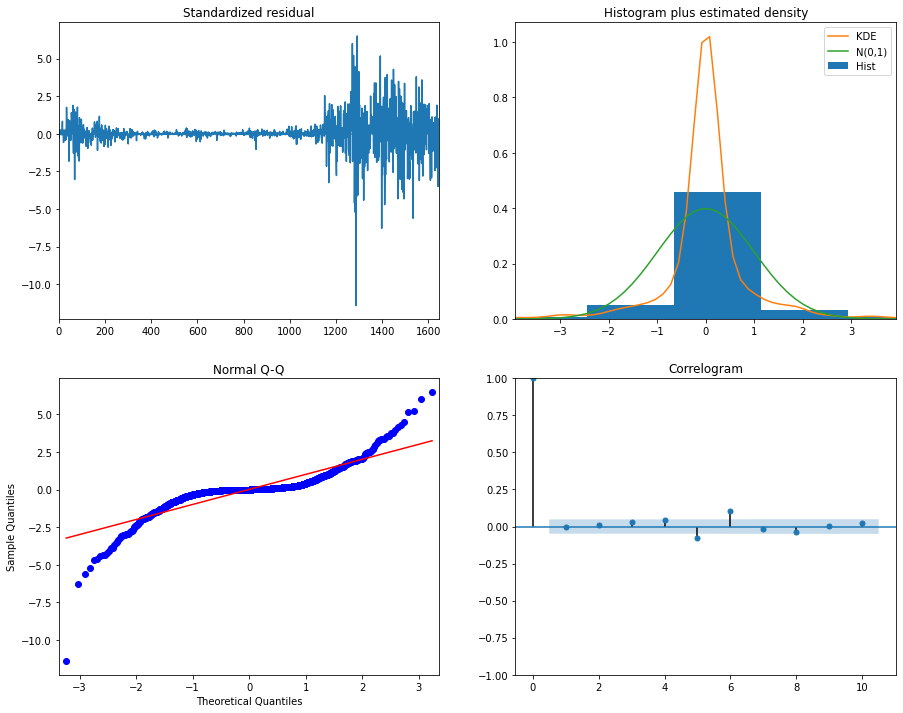

In [ ]:
# Diagnosing the model residuals
results_eth.plot_diagnostics(figsize = (15, 12))
plt.show()

In [ ]:
# Divide into train and validation set to calculate R-squared score
train_eth = df_eth[:int(0.85 * (len(df_eth)))]
test_eth  = df_eth[int(0.85 * (len(df_eth))):]

train_eth.shape, test_eth.shape

((1401, 2), (248, 2))

In [ ]:
start_eth = len(train_eth)
end_eth   = len(train_eth) + len(test_eth) - 1
predictions_eth = results_eth.predict(start = start_eth, end = end_eth, dynamic = False, typ = 'levels').rename('Simple Exponential Smoothing Predictions')
print(predictions_eth)

1401    3431.753079
1402    3225.907340
1403    3267.376772
1404    3400.799907
1405    3293.050159
           ...     
1644    2338.295116
1645    2089.513989
1646    1970.058913
1647    2011.517656
1648    2053.347412
Name: Simple Exponential Smoothing Predictions, Length: 248, dtype: float64


In [ ]:
# Create a dataframe to store r2 score
evaluation_results_eth = pd.DataFrame({'r2_score': r2_score(test_eth['Close'], predictions_eth)}, index = [0])

# Display the results
evaluation_results_eth

,r2_score
0,0.958423


**Although, the implementation of our Statistical Exponential Smoothing Model on Etherium is slightly lower than with the Bitcoin, it is still presenting good results.**

---

<a id="AUTO"></a>

---

# Automation and Decision-Making Function: 

## Custom Made Function to train the model, request external API and recommend the user to either sell or buy assets according to price prediction for the next day.

---

The function below will perform the following tasks:
*  Train the model once a day
*  Find the middle value of the dataset
*  HTTP request to find the real time of the crypto (Bitcoin)
*  According to the position of value-predicted for the following day/real-time value in comparison with the top and bottom section defined in the business case, return an statistical advice.

---


In [ ]:
import requests

In [ ]:
from threading import Timer

The packages above have the purpose of:
* requests = prooceding with the API call to find out the real value of the Bitcoin
* Timer from threading = create a time-interval which will recursively call the custom made functions

---

The API chosen to check the real time value of the Bitcoin was bitpay.com.
The function below returns only the required rate

In [ ]:
def find_real_time_value():
    real_time_price = requests.get('https://bitpay.com/api/rates/USD')
    x = real_time_price.json()
    return x['rate']


---
The following custom made function receives as a parameter a dataset, and returns the middle value of the dataset.
This step will help in the Decision-making feature.

---

In [ ]:
def get_middle_value(data):
    high = 0
    low = 0
    middle_value = 0
    
    # Finding higher and lowest values in order to get a middle value
    for x in data:
        if high > x:
            high = high
        else:
            high = x
        
        if low < x:
            low = low
        else:
            low = x
        
        middle_value = (high - low)/2 
            
    return middle_value

test = get_middle_value(df['Close'])
print(test)

33783.4140625


---
The following two custom made functions, are as follows:
* **get_highest**: Receives a dataset, returns the highest value of it
* **get_lowest**: Receives a dataset, returns the lowest value presented on it

--

In [ ]:
def get_highest(data):
    highest = 0
    for x in data:
        if highest > x:
            highest = highest
        else:
            highest = x
            
    return highest

In [ ]:
def get_lowest(data):
    lowest = 0
    for x in data:
        if lowest < x:
            lowest = lowest
        else:
            lowest = x
            
    return lowest

---
The **model_training** function receives **two parameters**:
* dataset
* days to predict

Although the function will proceed with the model fitting and prediction, it is still need the datapreparation to be done before the dataset be sent as parameter.

The first 'setInterval' is used, making the model_training function runs every 24 hours.

---

In [ ]:
# Train the Model
# Function to train a general model every 24h

def model_training(dataset, days_to_predict):
    run = True
    HORIZON = days_to_predict

    model = ExponentialSmoothing(endog = dataset['Close'])
    results = model.fit()

    preds = results.get_forecast(steps=HORIZON)

    preds.summary_frame(alpha=0.2).head()
    
    def call_train():
        model_training(dataset, days_to_predict)
        
    if run:
        Timer(86400, call_train).start()
    
    return preds

---
The cherry on the top of the cake:

**statistical_decision() function.**

The function receives the following parameters:
* The fitted Model
* The dataset

The function works as follows:

*First Phase*

1. The function calls the get_highest and the get_lowest functions
2. Sets a top_bounder and bottom_bounder with a zero initial value
3. Sets run = True (run will enables the Timer runs and the automation works)

*Second Phase*

1. Gets the real time of the Bitcoin, calling the find_real_time_value()
2. Gets the middle value, calling the get_middle_value function
3. Re-assign the top_bounder and the bottom_bounder to 2/3 of the highest and the lowest values, respectively.

*Third Phase*

- The Decision-making logic

The decision-making logic is based on the business case of the project.
The variable 'v' receives the step ahead predicted value, and confronts it with the top and bottom bounders previously defined, returning a statistical decision according to where the predicted value is in relation to the defined top and bottom bounders.

The timer runs every minute as the API updates the bitcoin real time value each 60s.


---

In [ ]:
def statistical_decision(model, data):
    # Defining boundaries
    high = get_highest(data)
    low = get_lowest(data)
    
    top_bounder = 0
    bottom_bounder = 0
    
    run = True
    
    # Checking real time of the bitcoin in USD
    x = find_real_time_value()
    
    # Get Middle value
    m = get_middle_value(data)
    one_third_high = (high - m)/3
    one_third_bottom = (low - m)/3
    top_bounder = m + one_third_high * 2
    bottom_bounder = m + one_third_bottom * 2 
    
    # Decision logic
    v = model.forecast(steps=1)
    
    to_return_1 = 'Real time value is:'
    to_return_2 = ',Predicted value for tomorrow is:'
    advice_buy = 'Buy, this is a good time to invest'
    advice_sell = 'Sell, is time to sell so you don`t lose any money.' 
    
    if v.item() > top_bounder:
        print('Sell!', to_return_1, x, to_return_2, v.item())
        return advice_sell
    
    elif v.item() < bottom_bounder:
        print('Sell!', to_return_1, x, to_return_2, v.item())
        return advice_sell
        
    elif v.item() > bottom_bounder:
        print('Buy!', to_return_1, x, to_return_2, v.item())
        return advice_buy
    elif v.item() < top_bounder:
        print('Buy!', to_return_1, x, to_return_2, v.item())
        return advice_buy
    def call():
        statistical_decision(model, data)
        
    if run:
        Timer(60, call).start()
        
    

---

Calling the statistical_decision() function and passing as parameter:
- The model = results
- The dataset = df['Close']

In [ ]:
advices = statistical_decision(results, df['Close'])
advices

Buy! Real time value is: 30850.18 ,Predicted value for tomorrow is: 30860.669200006978


'Buy, this is a good time to invest'

<a id="DASH"></a>

---
# BUILDING DASH
---


In [ ]:
#pip install dash

In [ ]:
#pip install dash_bootstrap_components

In [ ]:
import dash
import dash_html_components as html
import plotly.graph_objects as go
import dash_core_components as dcc
import plotly.express as px
from dash.dependencies import Input, Output
from dash import Dash, dcc, html, Input, Output, State,callback_context, dash_table
import dash_bootstrap_components as dbc



app = dash.Dash()

In [ ]:
app.layout = html.Div([

html.Div([
    html.Img( src = 'https://freepngimg.com/thumb/bitcoin/59620-cryptocurrency-bitcoin-free-frame.png',
             style = {'width':'150px','display':'block', 'margin-left':'auto', 'margin-right':'auto', 'float':'right'}),
    html.Img( src = 'https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fupload.wikimedia.org%2Fwikipedia%2Fcommons%2Fthumb%2F6%2F6f%2FEthereum-icon-purple.svg%2F1200px-Ethereum-icon-purple.svg.png&f=1&nofb=1',
             style = {'width':'150px','display':'block', 'margin-left':'auto', 'margin-right':'auto', 'float':'right'}),
    
    ]),

html.Div([
    
    html.Img( src = 'https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.whichcollege.ie%2Fwp-content%2Fuploads%2F2020%2F03%2FCCT_Logo_New_Aug_17.jpg&f=1&nofb=1',
             style = {'width':'200 px','display':'block', 'margin-left':'auto', 'margin-right':'auto'}),
    html.H1(id = 'H15', children = 'Crypto Prediction', style = {'textAlign':'center',\
                                            'marginTop':40,'marginBottom':40, 'font-family': 'Tahoma, sans-serif', 'font-size':'40px'}),
    html.H2(id = 'H21', children = 'Jonathan Santos', style = {'textAlign':'center',\
                                            'marginTop':40,'marginBottom':40,'font-family': 'Tahoma, sans-serif'}),
    
    html.H2(id = 'H22', children = 'Jose Moises Munoz Arguetta', style = {'textAlign':'center',\
                                            'marginTop':40,'marginBottom':40,'font-family': 'Tahoma, sans-serif'}),
    
    html.H2(id = 'H23', children = 'Mario Sergio Franca Rosa', style = {'textAlign':'center',\
                                            'marginTop':40,'marginBottom':40,'font-family': 'Tahoma, sans-serif'}),
                                                
    html.H2(id = 'H24', children = 'Willian Fernando Voelz', style = {'textAlign':'center',\
                                            'marginTop':40,'marginBottom':40, 'font-family': 'Tahoma, sans-serif'}),
    
    
    html.Button('buy-sell', id='buy-sell', n_clicks=0, style = {'width':'200 px','display':'block', 'margin-left':'auto', 
                                                                'margin-right':'auto', 'font-size': '20px',
                                                               'border-radius': '8px',
                                                               'box-shadow': '0 8px 16px 0 rgba(0,0,0,0.2), 0 6px 20px 0 rgba(0,0,0,0.19)',
                                                               'padding': '14px 40px'}),
    html.Button('Clear', id='click-2', n_clicks=0, style = {'width':'100 px','display':'block', 'margin-left':'auto', 
                                                                'margin-right':'auto', 'font-size': '20px',
                                                               'border-radius': '8px',
                                                               'box-shadow': '0 8px 16px 0 rgba(0,0,0,0.2), 0 6px 20px 0 rgba(0,0,0,0.19)',
                                                               'padding': '10px 30px'}),
    html.Div(id='confirm-msg', style = {'textAlign':'center',\
                                            'marginTop':40,'marginBottom':40, 'color':'green', 'font-family': 'Tahoma, sans-serif', 'font-size': '40px'}),
     
    ]),

    
html.Div([
            

        html.H1(id = 'H3',children = 'Bitcoin', style = {'textAlign':'center',\
                                            'marginTop':40,'marginBottom':40}),
        dcc.Dropdown( id = 'dropdown',
        options = [
            {'label':'Bitcoin - Prophet', 'value':'Prof' },
            {'label': 'Bitcoin - ARIMA', 'value':'arm'},
            {'label': 'Bitcoin - Smoothing', 'value':'smt'},
            {'label': 'Bitcoin - LSTM', 'value':'lstm'},
            ],
        value = 'arm', style = {'background-color': 'lightblue'}),
        dcc.Graph(id = 'bar_plot')
        
    ]),

html.Div([       
            
        html.H1(id = 'H2',children = 'Ethereum ', style = {'textAlign':'center',\
                                            'marginTop':40,'marginBottom':40}),
        dcc.Dropdown( id = 'dropdown_et',
        options = [
            {'label':'Ethereum - Prophet', 'value':'Prof-eth' },
            {'label': 'Ethereum - ARIMA', 'value':'arm-eth'},
            {'label': 'Ethereum - Smoothing', 'value':'smt-eth'},
           
            ],
        value = 'arm-eth', style = {'background-color': 'lightblue'}),
        dcc.Graph(id = 'bar_plot_et')
        
    ]),
    

html.Div([
    html.Button('10 Days Prediction Prophet model', id='btn-nclicks-1', n_clicks=0, style={'width':'200 px','display':'block', 'margin-left':'auto', 
                                                                'margin-right':'auto', 'font-size': '20px',
                                                               'border-radius': '8px',
                                                               'box-shadow': '0 8px 16px 0 rgba(0,0,0,0.2), 0 6px 20px 0 rgba(0,0,0,0.19)',
                                                               'padding': '14px 40px'}),
    html.Button('10 Days Prediction Arima model', id='btn-nclicks-2', n_clicks=0, style={'width':'200 px','display':'block', 'margin-left':'auto', 
                                                                'margin-right':'auto', 'font-size': '20px',
                                                               'border-radius': '8px',
                                                               'box-shadow': '0 8px 16px 0 rgba(0,0,0,0.2), 0 6px 20px 0 rgba(0,0,0,0.19)',
                                                               'padding': '14px 47px'}),
    html.Button('10 Days Prediction Smoothing model', id='btn-nclicks-3', n_clicks=0, style={'width':'200 px','display':'block', 'margin-left':'auto', 
                                                                'margin-right':'auto', 'font-size': '20px',
                                                               'border-radius': '8px',
                                                               'box-shadow': '0 8px 16px 0 rgba(0,0,0,0.2), 0 6px 20px 0 rgba(0,0,0,0.19)',
                                                               'padding': '14px 28px'}),
    html.Div(id='container-button-timestamp',style={'font-size':'15px'}),
    
], )
    #style={'display':'flex','justify-content':'center', 'align-items':'center'}



    
   
    ])

In [ ]:
@app.callback(
    Output('confirm-msg', 'children'),
    Input('buy-sell', 'n_clicks'),
    Input('click-2', 'n_clicks')
)
def display_confirm(btn1, btn2):
    changed_id = [p['prop_id'] for p in callback_context.triggered][0]
    
    if 'buy-sell' in changed_id:
        msg = advices
        if msg == 'Buy, this is a good time to invest':
            return html.Div(msg)
        elif msg == 'Sell, is time to sell so you don`t lose any money.':
            return html.Div(msg, style = {'color': 'red'})
        return html.Div()
        
    elif 'click-2' in changed_id:
        msg_2 = ''
        return html.Div(msg_2)
    else:
        msg_3 = ''
    return html.Div(msg_3)

In [ ]:
@app.callback(Output(component_id='bar_plot', component_property= 'figure'),
              [Input(component_id='dropdown', component_property= 'value')])

def graph_update(dropdown_value):
    print(dropdown_value)
    
    if dropdown_value == 'Prof':
        fig = go.Figure()
        
        fig.add_trace(go.Scatter(x = forecast['ds'],y = forecast['yhat'],\
                     line = dict(color = 'firebrick', width = 4), name = 'Trained data'
                     ))
        fig.add_trace(go.Scatter(x = forecast['ds'].iloc[1826:],y = forecast['yhat'].iloc[1826:],\
                     line = dict(color = 'blue', width = 4), name = 'Predition'
                     ))
        fig.update_layout(title = 'Prices over time',
                      xaxis_title = 'Dates',
                      yaxis_title = 'Prices'
                      )
        return fig

    elif dropdown_value == 'arm':

        fig_two = go.Figure()
        fig_two.add_trace(go.Scatter(y = df_ar['Close'],\
                     line = dict(color = 'firebrick', width = 4), name = 'Data')
                     )
        fig_two.add_trace(go.Scatter(x = [1826,2191], y = forecast_values.predicted_mean,\
                     line = dict(color = 'blue', width = 4), name = 'Data')
                     )
        fig_two.update_layout(title = 'Prices over time',
                      xaxis_title = 'Dates',
                      yaxis_title = 'Prices'
                      )    

        return fig_two  
                                 
    elif dropdown_value == 'smt':
        fig_three = go.Figure()
        
        fig_three.add_trace(go.Scatter(y =  df['Close'].iloc[-25:],\
                     line = dict(color = 'green', width = 4), name = 'Data'
                     ))
        fig_three.add_trace(go.Scatter(x = [25,35], y = forecast_80['mean'].iloc[-25:],\
                     line = dict(color = 'firebrick', width = 4), name = 'Forecast'
                     ))
        fig_three.add_trace(go.Scatter(y = results.fittedvalues.iloc[-25:],\
                     line = dict(color = 'blue', width = 4), name = 'Fitted Values'
                     ))
        
        fig_three.update_layout(title = 'Prices over time',
                      xaxis_title = 'Dates',
                      yaxis_title = 'Prices'
                      )    
 
        return fig_three

    elif dropdown_value == 'lstm':
        fig_four = go.Figure()
        
        fig_four.add_trace(go.Scatter(y = test_lstm['Column_A'],\
                     line = dict(color = 'green', width = 4), name = 'Test'
                     ))
        fig_four.add_trace(go.Scatter(y = prediction['Column_A'],\
                     line = dict(color = 'firebrick', width = 4), name = 'Predition'
                     ))
        fig_four.update_layout(title = 'Prices over time',
                      xaxis_title = 'Dates',
                      yaxis_title = 'Prices'
                      ) 
        
        return fig_four
    
    else:
        print('test')
        

In [ ]:
@app.callback(Output(component_id='bar_plot_et', component_property= 'figure'),
              [Input(component_id='dropdown_et', component_property= 'value')])

def graph_update(dropdown_value):
    print(dropdown_value)
    
    if dropdown_value == 'Prof-eth':
        fig = go.Figure()
        fig.add_trace(go.Scatter(x = data_et['ds'],y = data_et['y'],\
                     line = dict(color = 'firebrick', width = 4), name = 'Data'
                     ))
        fig.add_trace(go.Scatter(x = forecast_et['ds'],y = forecast_et['yhat'],\
                     line = dict(color = 'blue', width = 4), name = 'Forecast'
                     ))
        fig.update_layout(title = 'Prices over time',
                      xaxis_title = 'Dates',
                      yaxis_title = 'Prices'
                      )
        return fig

    elif dropdown_value == 'arm-eth':
        fig_two = go.Figure()
        
        fig_two.add_trace(go.Scatter(y = df_eth['Close'],\
                     line = dict(color = 'firebrick', width = 4), name = 'Data')
                     )
        fig_two.add_trace(go.Scatter(x = [1649,2014], y = forecast_values_eth.predicted_mean,\
                     line = dict(color = 'blue', width = 4), name = 'Forecast')
                     )
        fig_two.update_layout(title = 'Prices over time',
                      xaxis_title = 'Dates',
                      yaxis_title = 'Prices'
                      )    

        return fig_two   
                                 
    elif dropdown_value == 'smt-eth':
        fig_three_et = go.Figure()
        
        fig_three_et.add_trace(go.Scatter(y =  df_eth['Close'].iloc[-85:],\
                     line = dict(color = 'green', width = 4), name = 'Dataset'
                     ))
        fig_three_et.add_trace(go.Scatter(x = [85,95], y = forecast_80_eth['mean'].iloc[-85:],\
                     line = dict(color = 'firebrick', width = 4), name = 'Forecast'
                     ))
        fig_three_et.add_trace(go.Scatter(y = results_eth.fittedvalues.iloc[-85:],\
                     line = dict(color = 'blue', width = 4), name = 'Fitted Values'
                     ))
        
        fig_three_et.update_layout(title = 'Prices over time',
                      xaxis_title = 'Dates',
                      yaxis_title = 'Prices'
                      )    
 
        return fig_three_et
    
    else:
        print('test')

In [ ]:
@app.callback(
    Output('container-button-timestamp', 'children'),
    Input('btn-nclicks-1', 'n_clicks'),
    Input('btn-nclicks-2', 'n_clicks'),
    Input('btn-nclicks-3', 'n_clicks')
)
def displayClick(btn1, btn2, btn3):
    changed_id = [p['prop_id'] for p in callback_context.triggered][0]
    
    if 'btn-nclicks-1' in changed_id:
        
        
        msg = 'Predictions for 10 days'

        fig = go.Figure(data=[go.Table(
            header=dict(values=['Date','Price Bitcoin','Price Ethereum',],
                        #fill_color='paleturquoise',
                        align='left'), 
            cells=dict(values=[forecast['ds'][1826:1836], forecast['yhat'][1826:1836], forecast_et['yhat'][1641:1651]],
               #fill_color='lavender',
               align='left'))
        ])
        return dcc.Graph(figure=fig)
        
                       

    elif 'btn-nclicks-2' in changed_id:

        fig_arm = go.Figure(data=[go.Table(
            header=dict(values=['Date','Price Bitcoin','Price Ethereum',],
                        #fill_color='paleturquoise',
                        align='left'), 
            cells=dict(values=[forecast['ds'][1826:1836], forecast_values.predicted_mean, forecast_values_eth.predicted_mean],
               #fill_color='lavender',
               align='left'))
        ])
        return dcc.Graph(figure=fig_arm)
        
        
    elif 'btn-nclicks-3' in changed_id:
        
        msg = 'Predictions 1 day ahead'

        fig_smt = go.Figure(data=[go.Table(
            header=dict(values=['Date','Price Bitcoin','Price Ethereum',],
                        #fill_color='paleturquoise',
                        align='left'), 
            cells=dict(values=[forecast['ds'][1826:1836], forecast_80['mean'], forecast_80_eth['mean']],
               #fill_color='lavender',
               align='left'))
        ])
        return dcc.Graph(figure=fig_smt)
        
    else:
        msg = 'Button 3 was most recently clicked'
        
    return html.Div(msg)


In [ ]:

if __name__ == '__main__': 
    app.run_server()

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/



INFO:__main__:Dash is running on http://127.0.0.1:8050/



 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
INFO:werkzeug:127.0.0.1 - - [15/May/2022 22:45:43] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [15/May/2022 22:45:43] "GET /_dash-layout HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [15/May/2022 22:45:43] "GET /_dash-dependencies HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [15/May/2022 22:45:43] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [15/May/2022 22:45:43] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [15/May/2022 22:45:43] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [15/May/2022 22:45:43] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [15/May/2022 22:45:43] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [15/May/2022 22:45:43] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:127

arm
arm-eth


INFO:werkzeug:127.0.0.1 - - [15/May/2022 22:45:47] "POST /_dash-update-component HTTP/1.1" 200 -


Prof


INFO:werkzeug:127.0.0.1 - - [15/May/2022 22:45:49] "POST /_dash-update-component HTTP/1.1" 200 -


Prof-eth


INFO:werkzeug:127.0.0.1 - - [15/May/2022 22:46:02] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [15/May/2022 22:46:03] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [15/May/2022 22:46:04] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [15/May/2022 22:48:00] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [15/May/2022 22:48:01] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [15/May/2022 22:48:01] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [15/May/2022 22:48:10] "POST /_dash-update-component HTTP/1.1" 200 -


arm


INFO:werkzeug:127.0.0.1 - - [15/May/2022 22:48:12] "POST /_dash-update-component HTTP/1.1" 200 -


smt


INFO:werkzeug:127.0.0.1 - - [15/May/2022 22:48:15] "POST /_dash-update-component HTTP/1.1" 200 -


lstm
